# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

###Problem Statement
E-news Express is an online news portal company. With an aim to increase subscriptions, the design team at E-news Express has researched and created a new landing page that has a new outline and more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, company randomly collected data from a sample 50 users each from the existing landing page users and the new landing page users. Company's Data Science team need to analyze the collected samples and determine the effectiveness of the new landing page as wells derive other insights and recommendations.

###Objectives

1. Do the users spend more time on the new landing page than on the existing landing page?
1. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
1. Does the converted status depend on the preferred language?
1. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataScienceUT/Project2/abtest.csv')

In [4]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [5]:
#Viewing the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
#Viewing the last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
#Checking the shape of the dataset
df.shape

(100, 6)

*   there are 100 rows and 6 columns

In [10]:
#Getting the statistical summary for the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


*   User Id is numeric identifier with no significance in analysis.
*   time_spent_on_the_page is the only numeric data and it has a mean of 5.378 when both new and old pages combined.

In [9]:
#Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

*   No missing values

In [11]:
#Check for duplicates
df.nunique()
#see whether any duplicates without userId
df[df.drop('user_id', axis=1).duplicated() == True]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


*  No duplicates

In [12]:
#check and make sure group and when landing page == new group is treatment and when landing page is old group is 'control' so that we can drop one column
#df.groupby(['group','landing_page']).size()
df[(((df['group'])=='control') & ((df['landing_page']) != 'old')) | (((df['group'])=='treatment') & ((df['landing_page']) != 'new'))]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


*  Verified landing page is always 'new' for treatment 'group' and 'old' for 'control' group. 

In [13]:
#colum userd_id and group can be dropped as they have no impact on analysis
df.drop(['user_id','group'], axis= 1, inplace=True)


*  dropped userd_id as it has no impact on analysis and dropped group column as landing_page value can be used in it's place in analysis

In [14]:
#split new and old into two dataframes for easy anaylsis
#dfOld = df[(df['landing_page']) == 'old'].drop('landing_page', axis=1).reset_index(drop=True)
#dfNew = df[(df['landing_page']) == 'new'].drop('landing_page', axis=1).reset_index(drop=True)

dfOld = df[(df['landing_page']) == 'old'].reset_index(drop=True).copy()
dfNew = df[(df['landing_page']) == 'new'].reset_index(drop=True).copy()

In [15]:
dfOld.head()

,landing_page,time_spent_on_the_page,converted,language_preferred
0,old,3.48,no,Spanish
1,old,3.02,no,French
2,old,5.28,yes,English
3,old,6.53,yes,Spanish
4,old,2.08,no,English


In [16]:
dfNew.head()

,landing_page,time_spent_on_the_page,converted,language_preferred
0,new,7.13,yes,English
1,new,4.40,no,Spanish
2,new,4.75,yes,Spanish
3,new,5.25,yes,French
4,new,10.71,yes,French


In [17]:
dfNew.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,50.0,6.2232,1.817031,1.65,5.175,6.105,7.16,10.71


In [18]:
dfOld.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,50.0,4.5324,2.581975,0.19,2.72,4.38,6.4425,10.3


*   Time spent on new landing page improved top to bottom

### Univariate Analysis

**Observations on Conversion Rate**

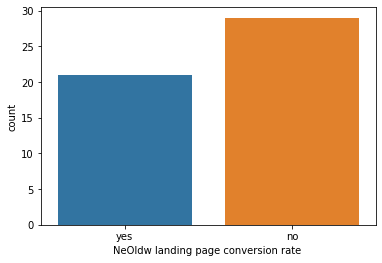

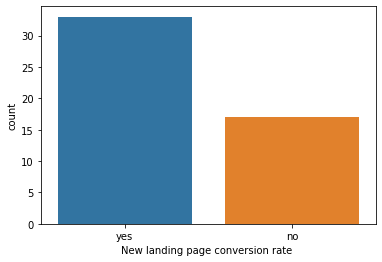

In [19]:
# check 'conversion to subscribers' by landing_page
sns.countplot(data=dfOld, x='converted', palette=["C0", "C1"], order=dfNew['converted'].value_counts().index)
plt.xlabel ('NeOldw landing page conversion rate ')
plt.show()
# check 'conversion to subscribers' by landing_page
sns.countplot(data=dfNew,x='converted', palette=["C0", "C1"], order=dfNew['converted'].value_counts().index)
plt.xlabel ('New landing page conversion rate ')
plt.show()

*   Number visitors converting to subscribers are higher for new landing page

**Observations on preferred language**

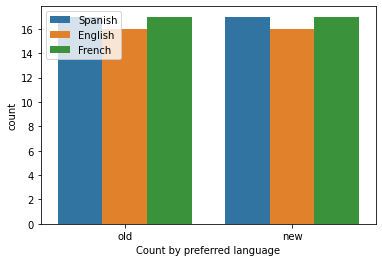

In [ ]:
# check conversion by language preference
# just using the full data instead of seperated ones
sns.countplot(data=df,x='landing_page', hue='language_preferred')
plt.xlabel ('Count of preferred language by old and new landing apges')
plt.legend(loc='upper left')
plt.show()



*   Most visitors converting to subscribers in old landing page has preferred language English while it is French for new landing page.
*   When combined old and new the most preferred language for subscribers is English
*   Also, the new landing page very well improved conversion rate among the French and Spanish language visitors.




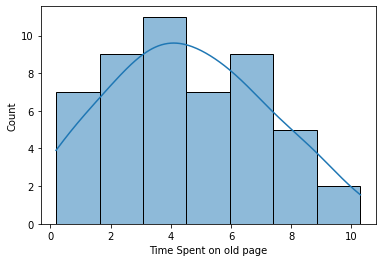

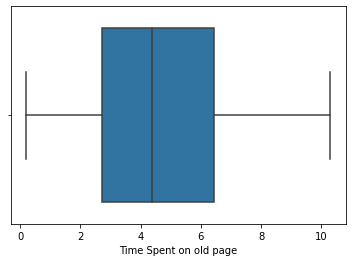

In [ ]:
sns.histplot(data=dfOld,x='time_spent_on_the_page', kde=True)
plt.xlabel ('Time Spent on old page')
plt.show()
sns.boxplot(data=dfOld,x='time_spent_on_the_page')
plt.xlabel ('Time Spent on old page')
plt.show()


*   Time spent on old page has a slight right skewed distribution and median a little higher than 4 minutes



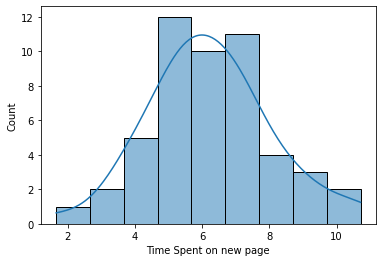

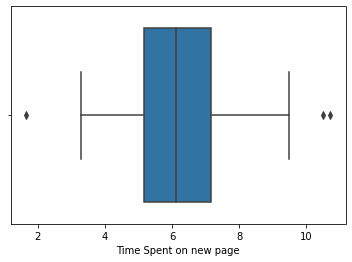

In [ ]:
sns.histplot(data=dfNew,x='time_spent_on_the_page', kde=True)
plt.xlabel ('Time Spent on new page')
plt.show()
sns.boxplot(data=dfNew,x='time_spent_on_the_page')
plt.xlabel ('Time Spent on new page')
plt.show()



*   Time spent on new page has normal distribution and median a little higher than 6 minutes and has some outliers


**Outlier check**

In [ ]:
#sort the landing page and get 5th and 95th percentile to check where outliers
print(dfNew.sort_values('time_spent_on_the_page').head())
print(dfNew.sort_values('time_spent_on_the_page').tail())
print(dfNew['time_spent_on_the_page'].quantile(0.05))
print(dfNew['time_spent_on_the_page'].quantile(0.95))

   landing_page  time_spent_on_the_page converted language_preferred
16          new                    1.65        no            Spanish
42          new                    3.30        no             French
9           new                    3.65        no            English
41          new                    3.68        no             French
35          new                    3.88        no            Spanish
   landing_page  time_spent_on_the_page converted language_preferred
8           new                    8.73        no            English
36          new                    9.12       yes             French
13          new                    9.49       yes            English
23          new                   10.50       yes            English
4           new                   10.71       yes             French
3.6635
9.3235


6.105
6.105
6.03


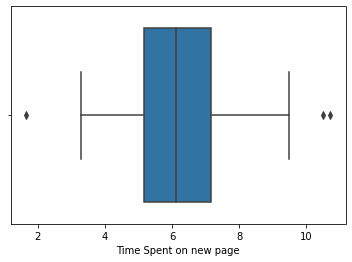

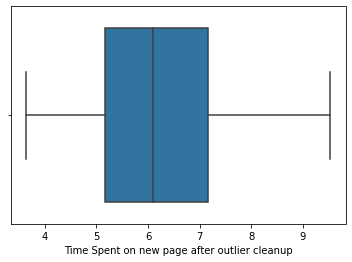

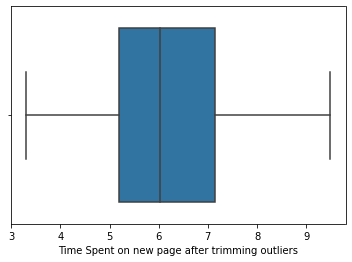

In [20]:
print( dfNew['time_spent_on_the_page'].median())
#replace left outliers with 96th % value
dfNewTimeSpent96Pval = dfNew['time_spent_on_the_page'].quantile(0.96)
dfNewTimeSpent04Pva = dfNew['time_spent_on_the_page'].quantile(0.04)
dfNewOutlierCheck = dfNew.copy()
dfNewWoOutliers = dfNew.copy()
dfNewWoOutliers = dfNewWoOutliers[(((dfNewWoOutliers['time_spent_on_the_page'])< 10) & ((dfNewWoOutliers['time_spent_on_the_page']) >2))]
dfNewOutlierCheck['time_spent_on_the_page'] = np.where (dfNewOutlierCheck['time_spent_on_the_page'] >dfNewTimeSpent96Pval, dfNewTimeSpent96Pval, dfNewOutlierCheck['time_spent_on_the_page'])
#replace right outliers with 4th % value
dfNewOutlierCheck['time_spent_on_the_page'] = np.where (dfNewOutlierCheck['time_spent_on_the_page'] < dfNewTimeSpent04Pva, dfNewTimeSpent04Pva, dfNewOutlierCheck['time_spent_on_the_page'])
print(dfNewOutlierCheck['time_spent_on_the_page'].median())
print(dfNewWoOutliers['time_spent_on_the_page'].median())
sns.boxplot(data=dfNew,x='time_spent_on_the_page')
plt.xlabel ('Time Spent on new page')
plt.show()
sns.boxplot(data=dfNewOutlierCheck,x='time_spent_on_the_page')
plt.xlabel ('Time Spent on new page after outlier cleanup')
plt.show()
sns.boxplot(data=dfNewWoOutliers,x='time_spent_on_the_page')
plt.xlabel ('Time Spent on new page after trimming outliers')
plt.show()

*  Ignoring outliers as they are not extremely high/low and not impacting statistical values much.


In [21]:
dfNew.describe()

,time_spent_on_the_page
count,50.000000
mean,6.223200
std,1.817031
min,1.650000
25%,5.175000
50%,6.105000
75%,7.160000
max,10.710000


### Bivariate Analysis

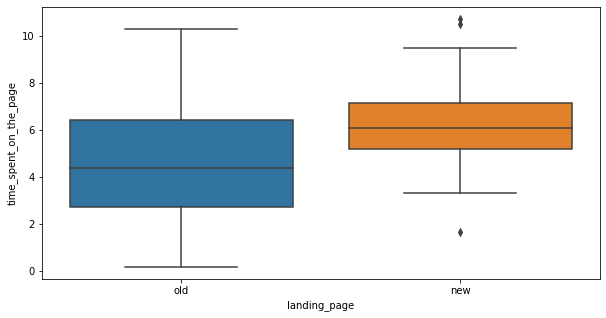

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data = df)
plt.show()


*   The median time spent on new landing page is higher than old landing page.
*   New page improved minimum time spent to above the 25% of old page when outlier is excluded

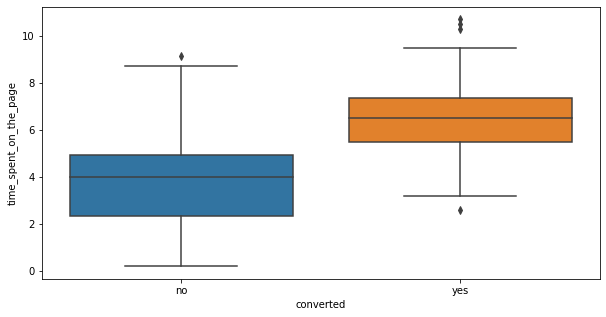

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x="converted", y="time_spent_on_the_page", data = df)
plt.show()


*  More the time spent more the chance for subscribing

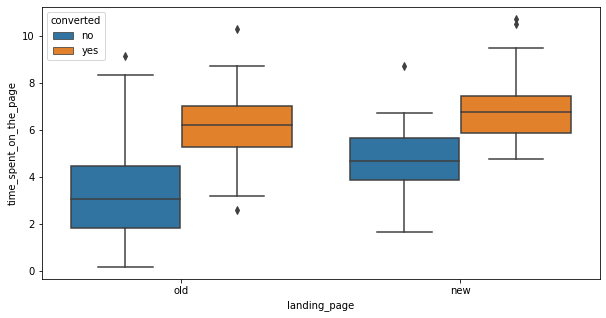

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x="landing_page", y="time_spent_on_the_page", hue="converted", data = df)
plt.show()

*   Median time spent among converted visitors seems close in new and old landing pages
*   Median time spent among non-converted visitors improved in new landing page 

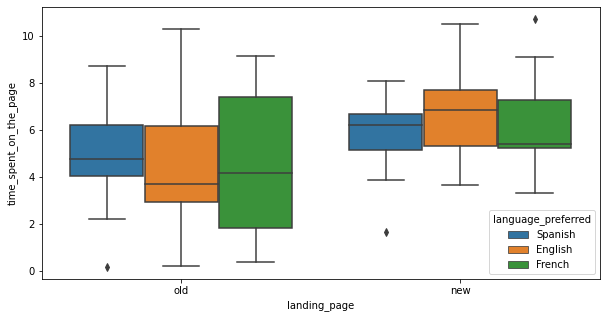

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x="landing_page", y="time_spent_on_the_page", hue="language_preferred", data = df)
plt.show()

*  Time spent improved in new landing page across all languages

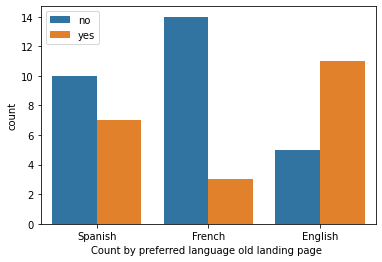

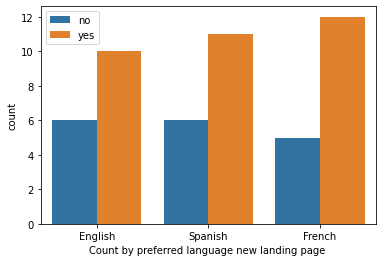

In [26]:

sns.countplot(data=dfOld,x='language_preferred', hue='converted', palette={"no": "C0", "yes": "C1"},  hue_order=["no","yes"])
plt.xlabel ('Count by preferred language old landing page ')
plt.legend(loc='upper left')
plt.show()

sns.countplot(data=dfNew,x='language_preferred', hue='converted',  palette={"no": "C0", "yes": "C1"},  hue_order=["no","yes"])
plt.xlabel ('Count by preferred language new landing page ')
plt.legend(loc='upper left')
plt.show()

*   Most visitors converting to subscribers in old landing page has preferred language English while it is French for new landing page.
*   Also, the new landing page helped to improve conversion rate among the French and Spanish language visitors.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

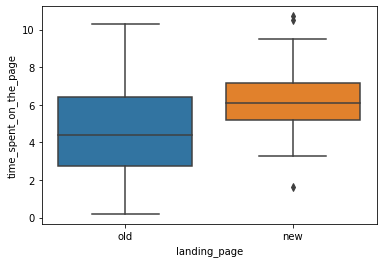

In [ ]:
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data = df)
plt.show()

* The median time spent on new landing page is higher than old landing page.
* Time spent on new page has some outliers.
* More than 75% of visitors spent nearly 5 minutes on the new landing page while it is nearly 3 for old landing page. 

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time on the new landing and the old landing page respectively.

> $H_0$ : users spend same time on the new landing and the old landing page ($\mu_1=\mu_2$)

> $H_a$ : users spend more time on the new landing page than the old landing page ($\mu_1 > \mu_2$)

### Step 2: Select Appropriate test

In [ ]:
# Test Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution. **So time_spent_on_the_page follows normal distribution**

In [ ]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on new page is ' + str(dfNew['time_spent_on_the_page'].mean()))
print('The mean time spent on old page is ' + str(dfOld['time_spent_on_the_page'].mean()))
print('The standard deviation of time spent on new page is ' + str(round(dfNew['time_spent_on_the_page'].std(),2)))
print('The standard deviation of time spent on old page is  ' + str(round(dfOld['time_spent_on_the_page'].std(),2)))

The mean time spent on new page is 6.2232
The mean time spent on old page is 4.532400000000001
The standard deviation of time spent on new page is 1.82
The standard deviation of time spent on old page is  2.58


In [ ]:
# Test Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(dfOld ['time_spent_on_the_page'],
                            dfNew['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.008950671168914445


Since p-value of the test is less than the 5% significance level, we will reject the null hypothesis sample std are equal.


* Continuous data - Yes, the usage time spent is measured on a continuous scale.
* Normally distributed populations - Yes, proved above with shapiro function.
* Independent populations - Yes, random samples for two different type of users.
* Equal population standard deviations - As the sample standard deviations are not equal.
* Random sampling from the population - Yes, problem statement state that the collected sample is a simple random sample.

> **Based on above findings Welch's t-Test will be appropriate**


### Step 3: Decide the significance level

As per the problem statement significance level $\alpha$ is 0.05

### Step 4: Collect and prepare data

In [ ]:
#Done at the top
print(dfNew.head())
print(dfOld.head())

  landing_page  time_spent_on_the_page converted language_preferred
0          new                    7.13       yes            English
1          new                    4.40        no            Spanish
2          new                    4.75       yes            Spanish
3          new                    5.25       yes             French
4          new                   10.71       yes             French
  landing_page  time_spent_on_the_page converted language_preferred
0          old                    3.48        no            Spanish
1          old                    3.02        no             French
2          old                    5.28       yes            English
3          old                    6.53       yes            Spanish
4          old                    2.08        no            English


### Step 5: Calculate the p-value

In [27]:
test_stat, p_value = stats.ttest_ind(dfNew ['time_spent_on_the_page'],
                            dfOld['time_spent_on_the_page'], equal_var = False, alternative='greater')
print('The p-value is ' + str(p_value))
print('The test stat is ' + str(test_stat))

The p-value is 0.0001392381225166549
The test stat is 3.7867702694199856


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since p-value of the test is much less than the 5% significance level, the null hypothesis will be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that users spend more time on the new landing page than the existing landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

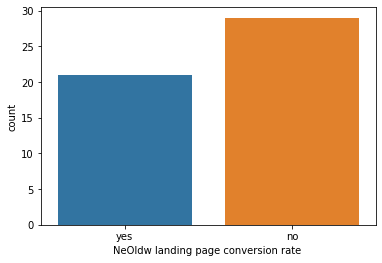

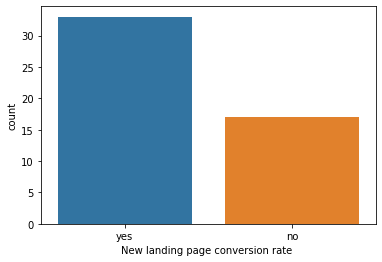

In [ ]:
# check 'conversion to subscribers' by landing_page
sns.countplot(data=dfOld, x='converted', palette=["C0", "C1"], order=dfNew['converted'].value_counts().index)
plt.xlabel ('NeOldw landing page conversion rate ')
plt.show()
# check 'conversion to subscribers' by landing_page
sns.countplot(data=dfNew,x='converted', palette=["C0", "C1"], order=dfNew['converted'].value_counts().index)
plt.xlabel ('New landing page conversion rate ')
plt.show()

*   Visually conversion rate is siginificantly higher for new landing page

### Step 1: Define the null and alternate hypotheses

Let $p_1,p_2$ be the proportions of conversion rate for the new page and the old page respectively.


>$H_0:p_1 =p_2$

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

#### Use 2 sample Z-test as the following assumptions are satisfied 

*   Binomally distributed population - Yes, either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


### Step 3: Decide the significance level

As per the problem statement significance level $\alpha$ is 0.05

### Step 4: Collect and prepare data

In [ ]:
dfOld['converted'].value_counts()

no     29
yes    21
Name: converted, dtype: int64

In [ ]:
dfNew['converted'].value_counts()

yes    33
no     17
Name: converted, dtype: int64

### Step 5: Calculate the p-value

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversion
conversion_rates = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_rates, nobs)
print('The p-value is ' + str(p_value))
print('The test stat is ' + str(test_stat))

The p-value is 0.016052616408112556
The test stat is 2.4077170617153842


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since p-value of the test is much less than the 5% significance level, the null hypothesis will be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that the proportions of conversion rate for the new page is greater than the conversion rate for the old page.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

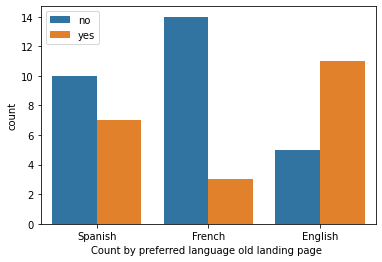

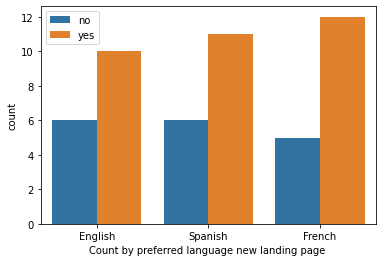

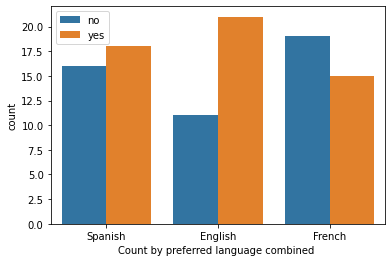

In [ ]:
sns.countplot(data=dfOld,x='language_preferred', hue='converted', palette={"no": "C0", "yes": "C1"},  hue_order=["no","yes"])
plt.xlabel ('Count by preferred language old landing page ')
plt.legend(loc='upper left')
plt.show()

sns.countplot(data=dfNew,x='language_preferred', hue='converted',  palette={"no": "C0", "yes": "C1"},  hue_order=["no","yes"])
plt.xlabel ('Count by preferred language new landing page ')
plt.legend(loc='upper left')
plt.show()

sns.countplot(data=df,x='language_preferred', hue='converted', palette={"no": "C0", "yes": "C1"},  hue_order=["no","yes"])
plt.xlabel ('Count by preferred language combined ')
plt.legend(loc='upper left')
plt.show()

* Visually conversion rate and preferred language are independent

### Step 1: Define the null and alternate hypotheses

> $H_0$ : conversion and preferred language are independent

> $H_a$ : conversion and preferred language are dependent

### Step 2: Select Appropriate test

#### Chi-Square Test for Independence can be used as the following assumptions are satisfied

* Categorical variables - Yes
* Expected value of the number of sample observations in each level is greater than 5.
* Random sampling from the population - Yes, collected sample is a simple random sample.

### Step 3: Decide the significance level

As per the problem statement significance level $\alpha$ is 0.05

### Step 4: Collect and prepare data

In [ ]:
#prepare contingency table
data_crosstab = pd.crosstab(df['language_preferred'],
                            df['converted'], 
                               margins = False)
print(data_crosstab)

converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(data_crosstab)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since p-value of the test is much greater than the 5% significance level, the null hypothesis will not be rejected. Thus, it may be concluded that there is enough statistical evidence to state that conversion and preferred language are independent.

**A similar approach can be followed to answer the other questions.**

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

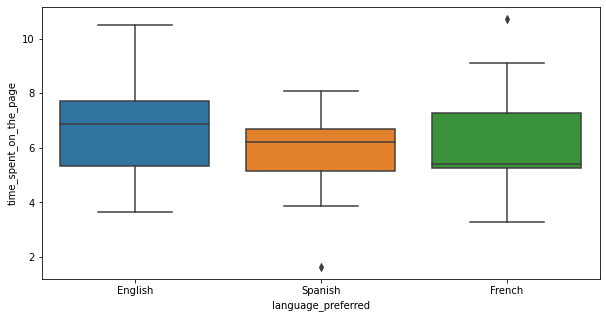

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data = dfNew)
plt.show()

In [ ]:
# count of different languages
dfNew["language_preferred"].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [ ]:
# mean of time spent for different languages
dfNew.groupby("language_preferred")["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

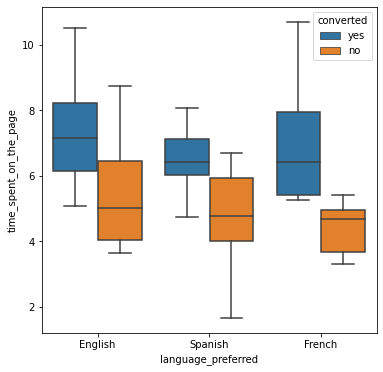

In [ ]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = dfNew, hue = 'converted')
plt.show()

* Visually time spent are different for the different language users

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent for Spanish, French and 
English respectively.

Null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternative hypothesis

>$H_a: $ Time spent on at least one language is different from the rest.


### Step 2: Select Appropriate test

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(dfNew['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the shapiro test is very large, we fail to reject the null hypothesis, so the time spent follows the normal distribution.

In [ ]:
#Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic, p_value = levene( dfNew['time_spent_on_the_page'][dfNew['language_preferred']=="Spanish"], 
                                   dfNew['time_spent_on_the_page'][dfNew['language_preferred']=="French"], 
                                   dfNew['time_spent_on_the_page'][dfNew['language_preferred']=="English"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances - population variances are equal.

#### One-way ANOVA Test is appropriate as the following assumptions are satisfied

* The populations are normally distributed, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Step 3: Decide the significance level

As per the problem statement significance level $\alpha$ is 0.05

### Step 4: Collect and prepare data

### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(dfNew.loc[dfNew['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              dfNew.loc[dfNew['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              dfNew.loc[dfNew['language_preferred'] == 'English', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))
print('The test-stat is ' + str(test_stat) )

The p-value is 0.43204138694325955
The test-stat is 0.8543992770006821


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since p-value of the test is much greater than the 5% significance level, the null hypothesis will not be rejected. Thus, it may be concluded that there is enough statistical evidence to state that the time spent on the new page same for the different language users.

**A similar approach can be followed to answer the other questions.**

## Conclusion and Business Recommendations



*   Visitors are spending more time on the new landing page than the old landing page
*   Conversion rate has increased more than 50% among new page visitors than old among old page visitors
*   Based on the sample data, although new page improved conversion rate among Spanish and French readers, there isn't enough statistical evidence to support the same.
*   Even though statistically language has no impact on conversion rate, making content available in more languages help to attract new visitors and thus increases the chance for adding more subscribers.
*   Collecting data about the content genre ad visitor demographics will help to provide better recommendations to improve visitor engagement and conversion rate.


___